<h1>What are the most demanded skills for the top 3 most popular data roles</h1>

<h3>Methodology</h3>

1.Clean up skill column

2.Calculate skill count based on job_title_short

3.Calculate skill percentage

4.Plot final findings

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading data

from datasets import load_dataset
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# data cleanup

import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_type_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

<h2>Filter Data for India</h2>
Filter the data for the market of India.

In [2]:
df_Ind = df[df['job_country'] == 'India']

<h2>Explode Skills</h2>

Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles.

In [3]:
df_skills = df_Ind.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
16,Big Data Engineer,"['powershell', 'python', 'sql', 'mysql', 'sql ..."
19,Data Scientist,"['r', 'sql', 'python', 'scala', 'java', 'c++',..."
29,Data Scientist,None
38,Data Quality and Governance Analyst 1,"['sql', 'python', 'databricks', 'power bi', 'e..."
42,"Senior Data Engineer(Python)-1563,1637&1633","['python', 'sql', 'aws', 'pyspark', 'docker', ..."
...,...,...
785712,India - Collections Analyst II,"['excel', 'flow']"
785715,Amul Careers 2023 - Apply Online - Data Analys...,None
785716,Application Support Analyst,"['c#', 'sql']"
785718,Senior Performance QA Analyst,None


<h2>Count Skills per Job Title</h2>

Groups DataFrame by job_skills and job_title_short, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. The final DataFrame, df_skills_count, shows the frequency of each skill with each job title.

In [4]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
12804,['python'],Data Scientist,439
1281,['excel'],Data Analyst,268
12629,"['python', 'sql']",Data Scientist,169
23289,['sql'],Data Engineer,146
589,['azure'],Data Engineer,139
...,...,...,...
9432,"['python', 'sql', 'aws', 'azure', 'excel', 'po...",Data Scientist,1
9431,"['python', 'sql', 'aws', 'azure', 'excel', 'je...",Data Analyst,1
9430,"['python', 'sql', 'aws', 'azure', 'databricks'...",Senior Data Engineer,1
9429,"['python', 'sql', 'aws', 'azure', 'databricks'...",Data Engineer,1


<h2>Create List of Top 3 Roles</h2>

Focus: Data Analysts, Data Engineers, and Data Scientists
Filter the job titles based on the most popular.

In [5]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

<h2>Plot Skill Counts</h2>

Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill.

C:\Users\DELL\AppData\Local\Temp\ipykernel_7140\1585521994.py:16: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout(h_pad=0.5) # fix the overlap


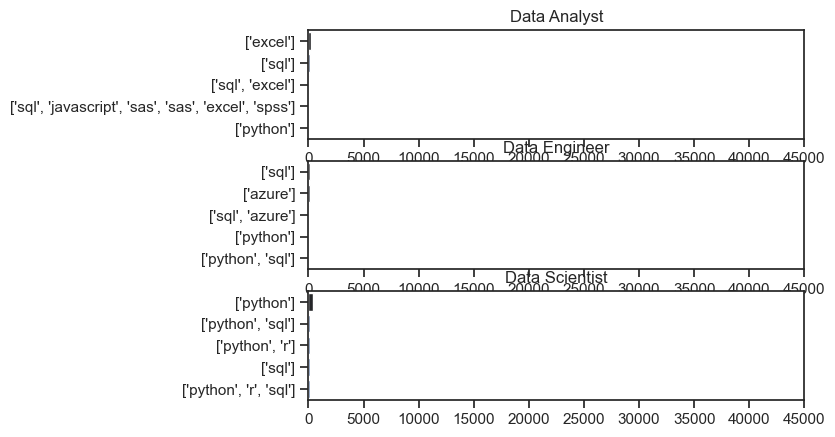

In [23]:
ffig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

fig.suptitle('Counts of Skills Requested in India Job Postings', fontsize=15)
plt.show()

<h2>Convert Counts to Percentages</h2>

Focus: Counts don't show what portions of jobs are requesting these skills
So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the value_counts() method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to job_title_short and total. The DataFrame df_job_title_count now holds a list of job titles alongside their total occurrences.

In [7]:
# Use original df to get the count of job titles
df_job_title_count = df_Ind['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


Then we calculate the percentages. First merge df_skills_count and df_job_title_count, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [8]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,['python'],Data Scientist,439,13279,3.305972
1,['excel'],Data Analyst,268,6121,4.378370
2,"['python', 'sql']",Data Scientist,169,13279,1.272686
3,['sql'],Data Engineer,146,19062,0.765922
4,['azure'],Data Engineer,139,19062,0.729199
...,...,...,...,...,...
23796,"['python', 'sql', 'aws', 'azure', 'excel', 'po...",Data Scientist,1,13279,0.007531
23797,"['python', 'sql', 'aws', 'azure', 'excel', 'je...",Data Analyst,1,6121,0.016337
23798,"['python', 'sql', 'aws', 'azure', 'databricks'...",Senior Data Engineer,1,4353,0.022973
23799,"['python', 'sql', 'aws', 'azure', 'databricks'...",Data Engineer,1,19062,0.005246


<h2>Plot Percentage Count</h2> 

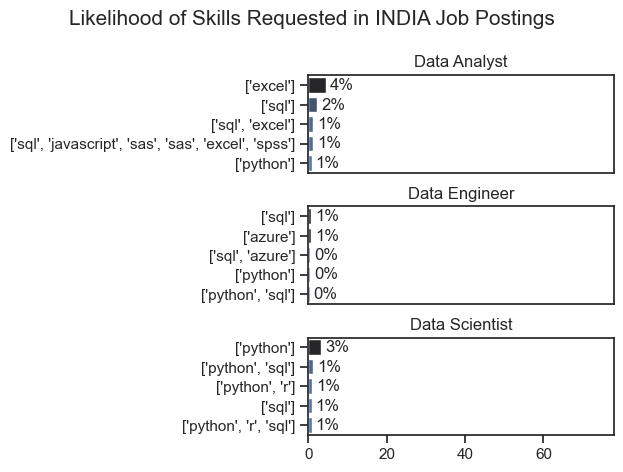

In [9]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in INDIA Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()